## The Topography with RocketPy

Hello, along this jupyter notebook we will show how RocketPy can handle with the Earth Topography. We mainly will use data provided by the NASADEM Merged DEM Global 1 arc second nc. NASA DEM is a digital elevation model based on the Shuttle Radar Topography Mission (SRTM), a collaboration between NASA and the National Geospatial-Intelligence Agency (NGA), as well as participation from the German and Italian space agencies. You can read more about NASADEM in the following website: https://cmr.earthdata.nasa.gov/search/concepts/C1546314436-LPDAAC_ECS.html

This is a first step forward stopping consider earth as flat and can get us much better results when we are flying next to montains or valleys

In [1]:
# First we import the Environment Class, which allows to set topographic profiles
from rocketpy import Environment

In [2]:
# Let's set an Environment consider a fictional launch at Switzerland
# First we set the basic information about our Environmetn object
Env = Environment(
    railLength= 6,
    latitude= 46.90479,
    longitude= 8.07575,
    datum="WGS84"
)

# Notice that the "datum" parameter is used only for the convertions
# from geodesic (i.e. lat/lon) to UTM coordinate system. 

# Now we finally set our topography
Env.setTopographicProfile(
    type='NASADEM_HGT',
    file="data/sites/switzerland/NASADEM_NC_n46e008.nc",
    dictionary='netCDF4',
    crs= None
)

# Once we defined the topographic profile, we can find the launch site elevation
elevation = Env.getElevationFromTopograghicProfile(46.90479, 8.07575)
# But you also could use the following line:
#elevation = Env.getElevationFromTopograghicProfile(Env.lat, Env.lon)

# With the following line we just adjust the Environment elevation
Env.setElevation(elevation)

Region covered by the Topographical file: 
Latitude from 46.000000° to 47.000000°
Longitude from 8.000000° to 9.000000°


Now we can see the elevation that we set, such as other important atributes of our Environment object

Launch Site Details

Launch Rail Length:  6  m
Launch Site Latitude: 46.90479°
Launch Site Longitude: 8.07575°
Reference Datum: WGS84
Launch Site UTM coordinates: 886538.30 E    5207102.17 N
Launch Site UTM zone: 31T
Launch Site Surface Elevation: 1565.0 m


Atmospheric Model Details

Atmospheric Model Type:  StandardAtmosphere
StandardAtmosphere Maximum Height: 80.000 km


Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 838.84 hPa
Surface Temperature: 277.98 K
Surface Air Density: 1.051 kg/m³
Surface Speed of Sound: 333.86 m/s


Atmospheric Model Plots


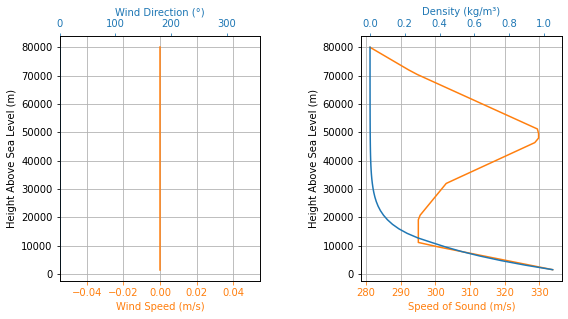

In [3]:
Env.info()

In [4]:
# If we want to, we can calculate the earth radius based on the Launch site latitude
# This could be important in future RocketPy versions 

eRadius = Env.calculateEarthRadius(Env.lat, Env.datum)

print("The Earth Radius at latitude {:.6f}°:  {:.2f} m".format(Env.lat, eRadius))

The Earth Radius at latitude 46.904790°:  6366778.95 m
